In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(360, 360)


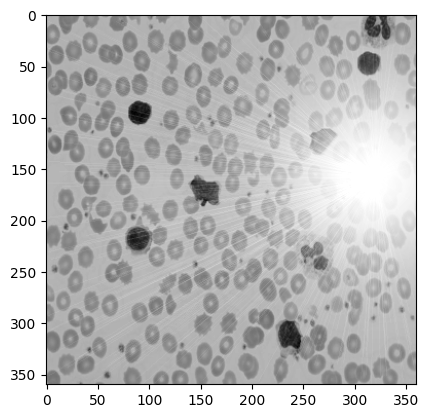

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/Images/cell-bright.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

In [ ]:
N = 10

dimh = np.int32(gImg.shape[0] / N)
dimw = np.int32(gImg.shape[1] / N)

dh_rest = np.int32(gImg.shape[0]%N)
dw_rest = np.int32(gImg.shape[1]%N)

meanImg = np.zeros((N,N))
outImg = np.zeros((gImg.shape[0], gImg.shape[1]))


In [ ]:
def mean_function(img, dimh, dimw, h, w):
  count = 1
  sum = 0
  avg = 0

  for y in range(h, h+dimh):
    for x in range(w, w+dimw):
      sum = sum + img[y,x]
      count = count + 1

  avg = np.int32(sum/count)
  return avg

In [ ]:
for h in range(0, gImg.shape[0]-dh_rest, dimh):
  for w in range(0, gImg.shape[1]-dw_rest, dimw):
    meanImg[np.int32(h/dimh), np.int32(w/dimw)] = mean_function(gImg, dimh, dimw, h, w)


(10, 10)


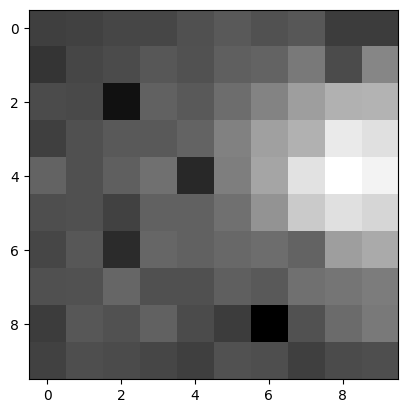

In [ ]:
#cv2_imshow(meanImg)
plt.imshow(meanImg, cmap='gray')
print(meanImg.shape)

In [ ]:
for h in range(0, gImg.shape[0]-dh_rest):
  for w in range(0, gImg.shape[1]-dw_rest):
    if(gImg[h,w] > meanImg[np.int32(h/dimh), np.int32(w/dimw)]):
      outImg[h,w] = 255
    else:
      outImg[h,w] = 0

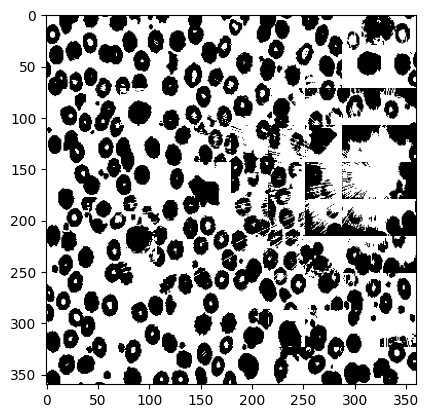

In [ ]:
plt.imshow(outImg, cmap='gray')